<a href="https://colab.research.google.com/github/VikitoHextech/TAREAS-SIMULACION/blob/main/Movimiento_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborar una Notebook que muestre una trayectoria de MB junto con un refinamiento en el intervalo [0,1].

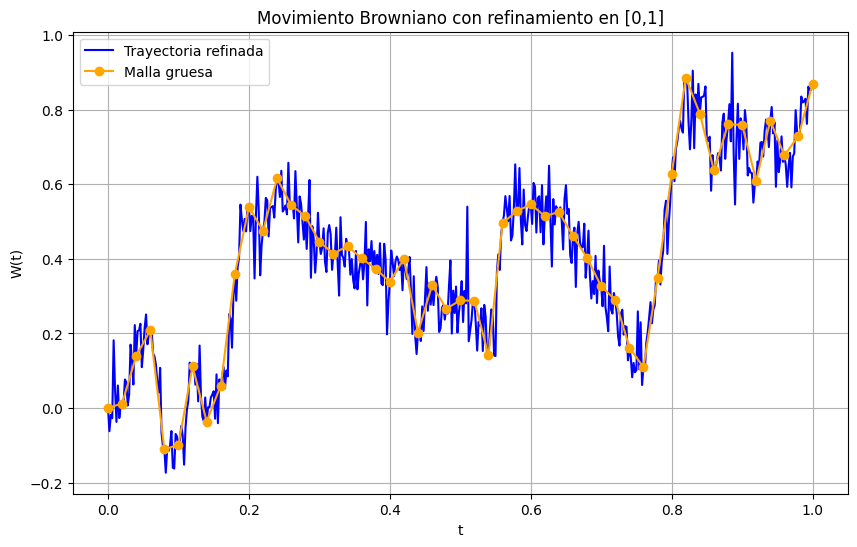

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0
L_g = 50              # malla gruesa
ref = 10                   # refinamiento por intervalo
L_f = L_g * ref

dt_g = T / L_g
dt_f = T / L_f


# 1. Trayectoria gruesa
W_g = np.zeros(L_g + 1)

for i in range(L_g):
    xi = np.random.normal()
    W_g[i+1] = W_g[i] + np.sqrt(dt_g) * xi

t_g = np.linspace(0, T, L_g + 1)

# 2. Refinamiento (Puente Browniano)
W_f = np.zeros(L_f + 1)
t_f = np.linspace(0, T, L_f + 1)

for k in range(L_g):
    # extremos del intervalo
    W_i = W_g[k]
    W_d = W_g[k+1]

    for j in range(ref):
        idx = k * ref + j
        s = j / ref

        m = (1 - s) * W_i + s * W_d

        # varianza del puente
        var = s * (1 - s) * dt_g

        W_f[idx] = m + np.sqrt(var) * np.random.normal()

W_f[-1] = W_g[-1]

# 3. Gráfica
plt.figure(figsize=(10, 6))

plt.plot(t_f, W_f, color="blue", label="Trayectoria refinada")
plt.plot(t_g, W_g, "o-", color="orange", label="Malla gruesa")

plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Movimiento Browniano con refinamiento en [0,1]")
plt.legend()
plt.grid(True)
plt.show()
